In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import warnings
warnings.filterwarnings("ignore")

# Project 
## Vehicle Price Prediction 

In [42]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Vehicle Price.csv")

# Data Info

In [43]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [44]:
df.shape

(1002, 17)

# Data Handling & Cleaning

In [46]:
# Drop rows with missing price and duplicates
df.dropna(subset=['price'], inplace=True)
df.drop_duplicates(inplace=True)

# Fill missing values
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [49]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# EDA, Visualization & Machine Learning

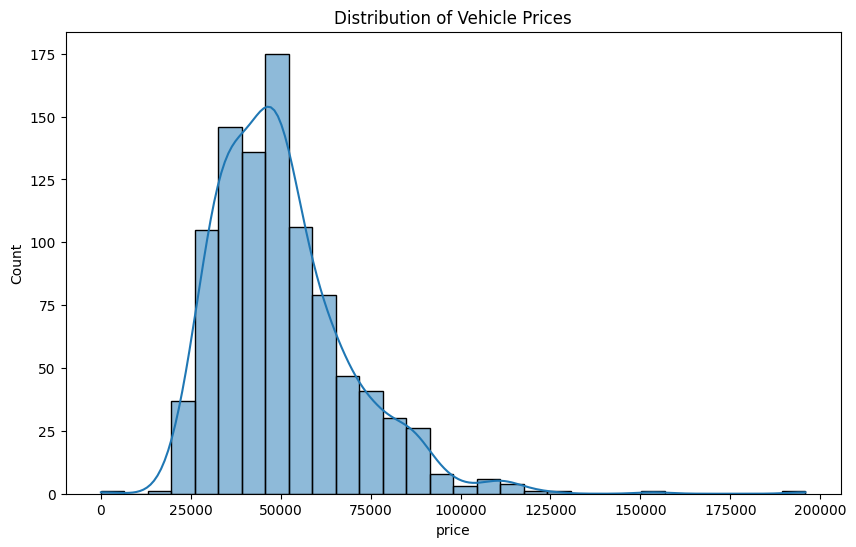

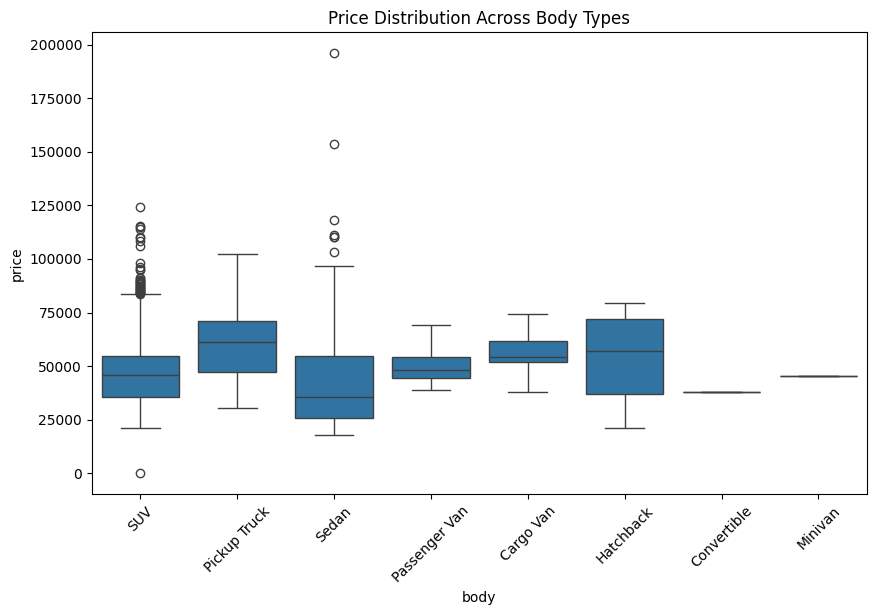

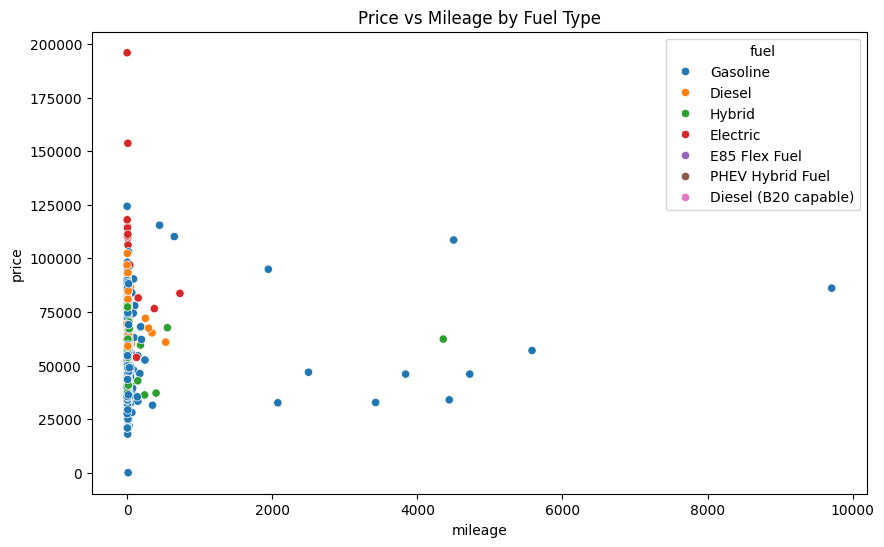

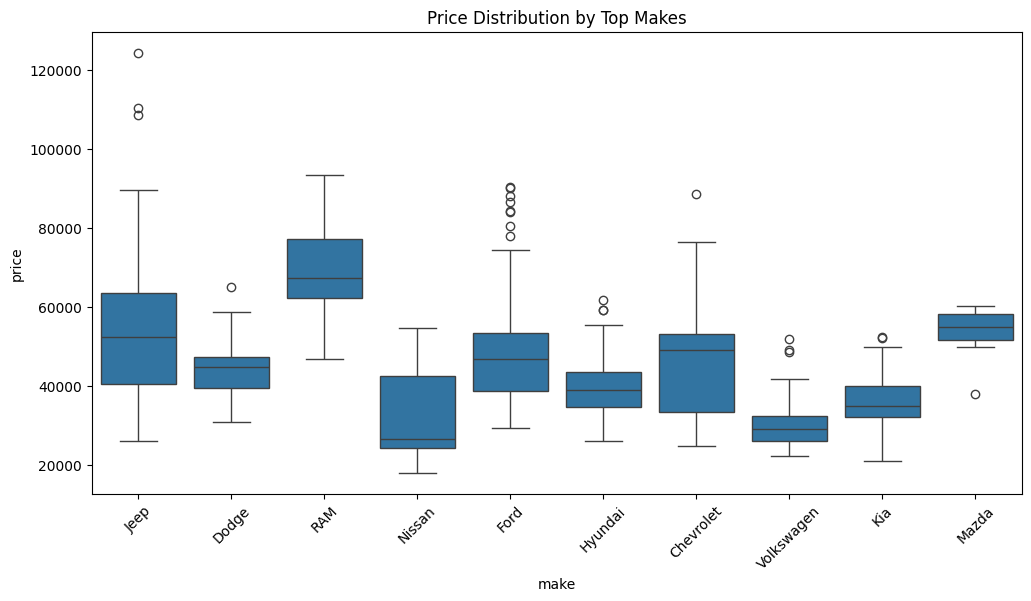

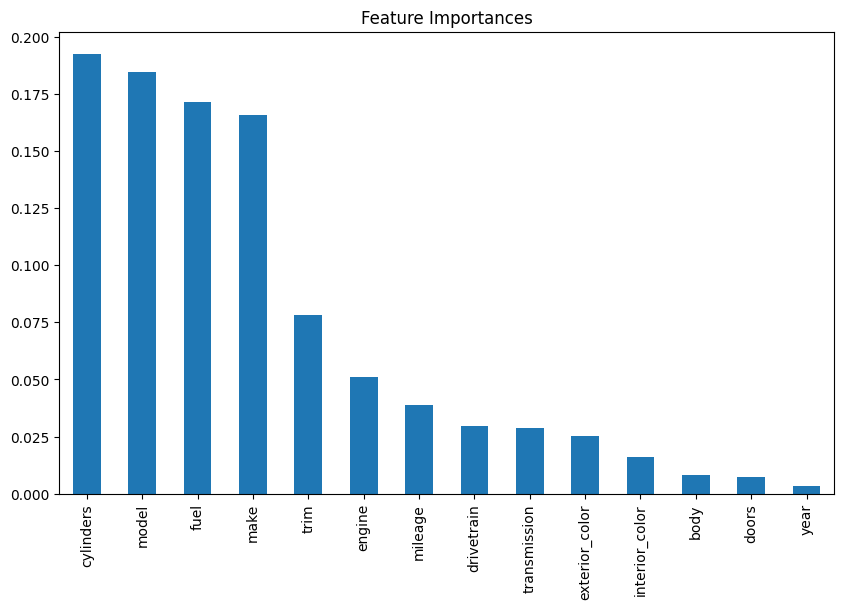

Mean Squared Error: 123896651.92043708
R² Score: 0.7454520155815445


In [48]:


# Fill missing values
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].median(), inplace=True)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# EDA Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Vehicle Prices')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='body', y='price', data=df)
plt.title('Price Distribution Across Body Types')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', hue='fuel', data=df)
plt.title('Price vs Mileage by Fuel Type')
plt.show()

plt.figure(figsize=(12, 6))
top_makes = df['make'].value_counts().nlargest(10).index
sns.boxplot(x='make', y='price', data=df[df['make'].isin(top_makes)])
plt.title('Price Distribution by Top Makes')
plt.xticks(rotation=45)
plt.show()

# Label encode categorical features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop(['price', 'description', 'name'], axis=1)
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Feature importances
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.show()

print("Mean Squared Error:", mse)
print("R² Score:", r2)
